In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import nltk

In [3]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [4]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [5]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)
print("2 most common :- ",fdist.most_common(2))

<FreqDist with 25 samples and 30 outcomes>
2 most common :-  [('is', 3), (',', 2)]


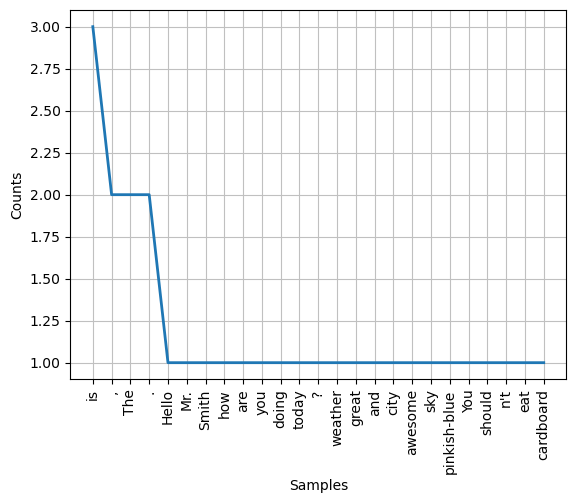

In [6]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [7]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'between', 'where', "wasn't", 'through', 'while', 'have', 'ma', 'some', 'just', 'hasn', 'again', 'hers', 'both', "weren't", 'there', 'should', 'am', 'these', "hadn't", 'on', 'weren', 'yours', "you're", 'by', 'own', 'hadn', 'had', 'itself', 'only', 'aren', 'same', 'below', "hasn't", 'any', 'few', 'no', 'will', 'why', 'what', "didn't", 'against', 'too', "you'll", 'himself', 'them', 'it', "that'll", 'ourselves', 'an', 'yourselves', 'before', 'doing', 'nor', 'won', 'did', 'your', 'most', 'me', 'their', "aren't", 'herself', 'y', 're', 'can', 'out', 'once', 'needn', 'each', 'now', 'doesn', 'to', 'ain', 'after', 'other', 'here', "isn't", "couldn't", 'mustn', "she's", "you've", "you'd", 'couldn', 'shan', "shouldn't", 'd', 'we', 'that', "needn't", 'for', 'be', 'and', 'does', 'about', 'but', 'being', 'very', 'or', 'a', 'shouldn', 'isn', "mightn't", 'him', 'wasn', 'll', 'who', 'o', 'ours', 'this', 'are', 'they', 'mightn', 'don', "don't", 'if', "should've", 'yourself', 'were', 'do', "haven't", "m

In [8]:
from nltk.tokenize import word_tokenize
text="""Hello Mr. Smith, how are you doing today?"""
tokenized_sent=word_tokenize(text)
################3
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?']
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?']


In [9]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?']


In [10]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


In [11]:
# Sentence Tokenization
sent = "Albert Einstein was born in Ulm, Germany in 1879."
tokens=nltk.word_tokenize(sent)
print(tokens)
# POS Tagging
nltk.pos_tag(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

In [12]:
# Import pandas
import pandas as pd

In [25]:
data=pd.read_csv('../DATA/train.tsv', sep='\t')
print(data.head())

   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  


In [26]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None


In [27]:
print(data.Sentiment.value_counts())

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


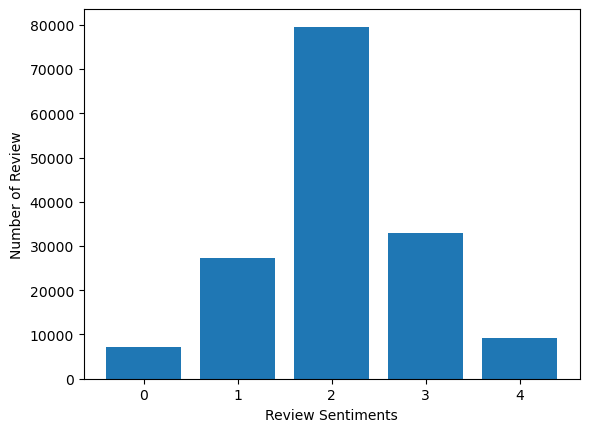

In [28]:
import matplotlib.pyplot as plt
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

In [30]:
print(type(text_counts))
print(text_counts.shape)
#print(text_counts.toarray())
print(text_counts.toarray())
#print(cv.vocabulary_)

<class 'scipy.sparse._csr.csr_matrix'>
(156060, 14988)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [32]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684
